Color Tracking

In [ ]:
import numpy as np
import cv2
from helper import draw
import imutils
import time


blueLower = np.array([100, 67, 0], dtype = "uint8")
blueUpper = np.array([255, 128, 50], dtype = "uint8")

camera = cv2.VideoCapture("video/iphonecase.mov")
while True:
    (grabbed, frame) = camera.read()

    if not grabbed:
        break

    blue = cv2.inRange(frame, blueLower, blueUpper)
    blue = cv2.GaussianBlur(blue, (3, 3), 0)
    cnts = imutils.grab_contours(cv2.findContours(blue.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE))

    if len(cnts) > 0:
        cnt = sorted(cnts, key = cv2.contourArea, reverse=True)[0]

        rect = np.int32(cv2.boxPoints(cv2.minAreaRect(cnt)))
        cv2.drawContours(frame, [rect], -1, (0, 255, 0), 2)

    draw("Tracking", frame)
    draw("Binary", blue)

    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()



Eye Tracking

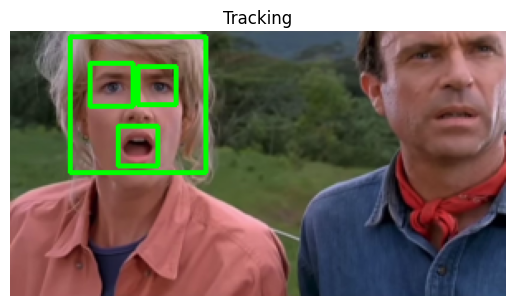

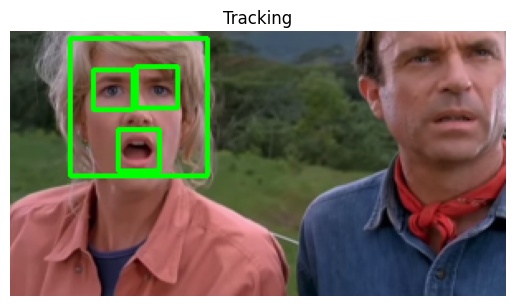

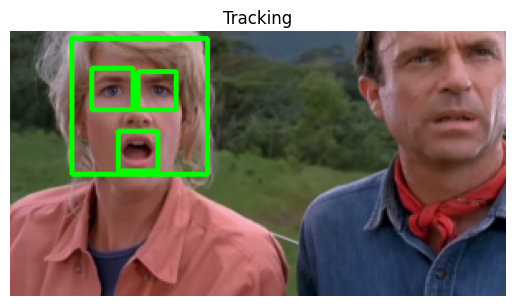

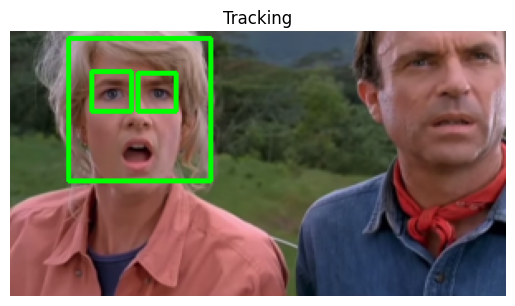

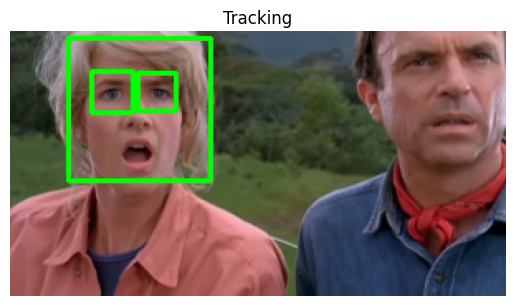

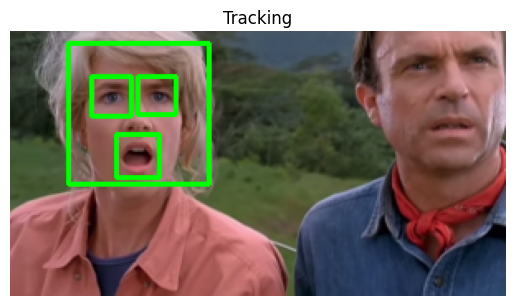

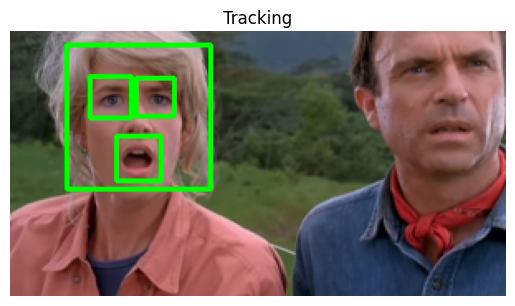

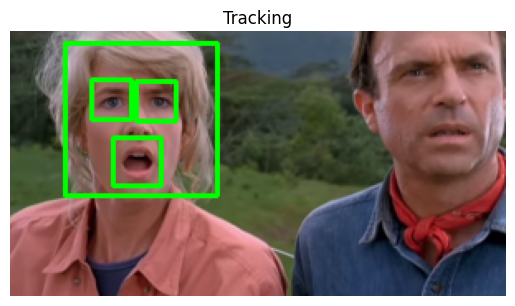

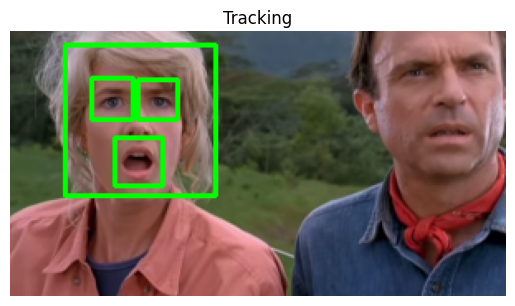

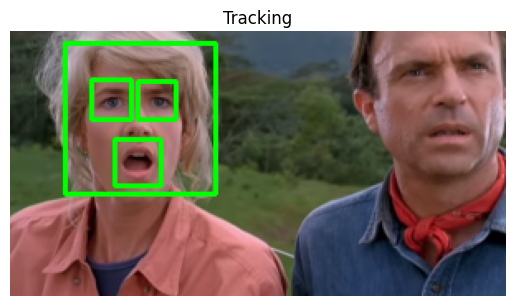

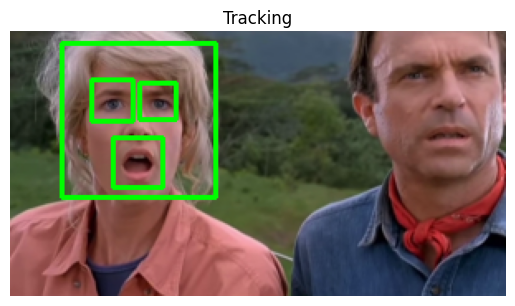

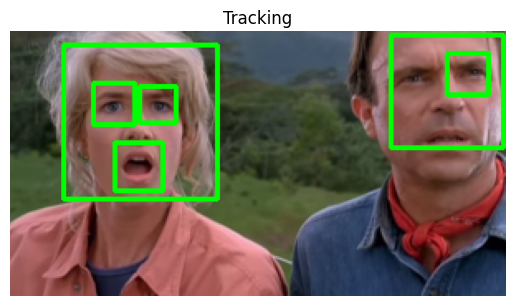

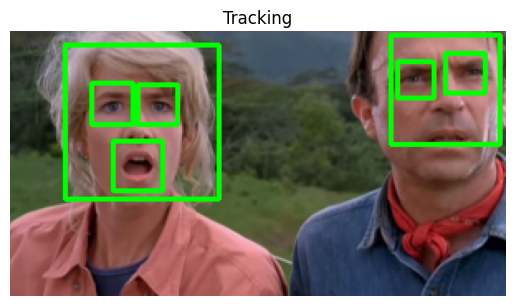

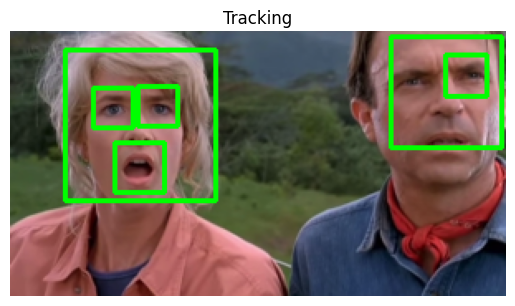

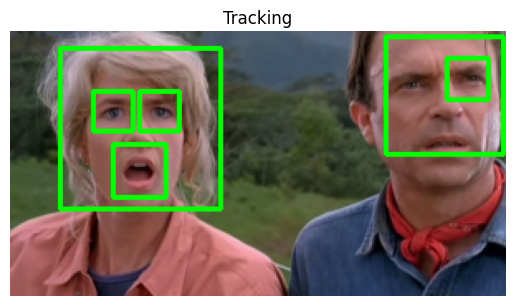

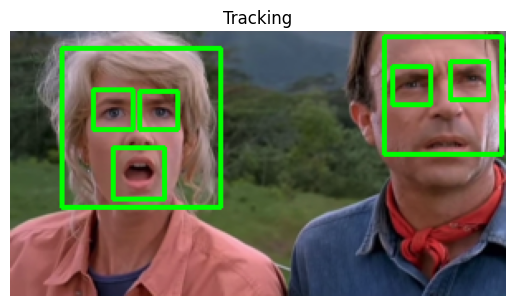

In [1]:
import cv2
import imutils
from eyetracker import EyeTracker
from helper import draw

et = EyeTracker("cascades/haarcascade_frontalface_default.xml", "cascades/haarcascade_eye.xml")
camera = cv2.VideoCapture("video/1.mov")

while True:
    (grabbed, frame) = camera.read()

    if not grabbed:
        break

    frame = imutils.resize(frame, width=300)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    rects = et.track(gray)

    for rect in rects:
        cv2.rectangle(frame, (rect[0], rect[1]), (rect[2], rect[3]), (0, 255, 0), 2)

    draw("Tracking", frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break


camera.release()
cv2.destroyAllWindows()